In [1]:
pip install dask

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pyarrow


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install --upgrade pyarrow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pyarrow
print(pyarrow.__version__)


20.0.0


In [6]:
import pandas as pd
from textblob import TextBlob

# Load the CSV file with Pandas
df = pd.read_csv('blogtext.csv')

# Sentiment function
def get_sentiment(text):
    if not isinstance(text, str):
        return 'neutral'
    score = TextBlob(text).sentiment.polarity
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment function to the 'text' column
df['sentiment'] = df['text'].apply(get_sentiment)

# Save the output to a single CSV file
df.to_csv('sentiment_textblob_output.csv', index=False)


C:\Users\RAMESH\AppData\Local\Temp\ipykernel_10956\1744196831.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')


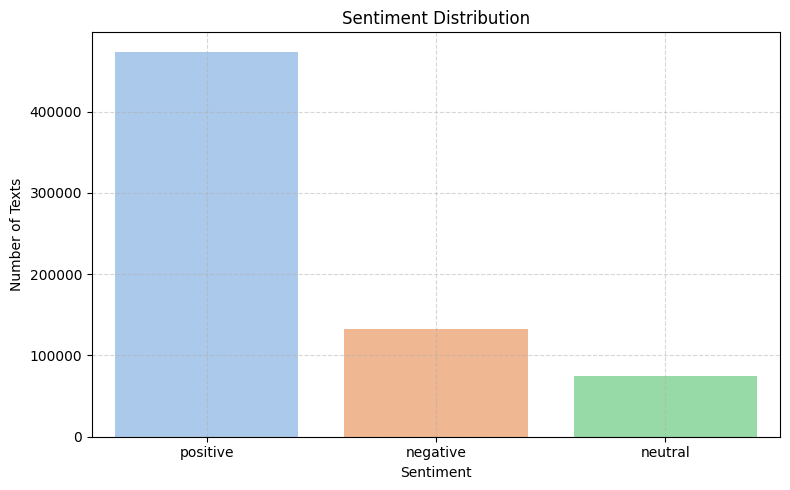

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of each sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Texts')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\RAMESH\AppData\Local\Temp\ipykernel_10956\3742026580.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sentiment = df.groupby(['age_group', 'sentiment']).size().unstack().fillna(0)


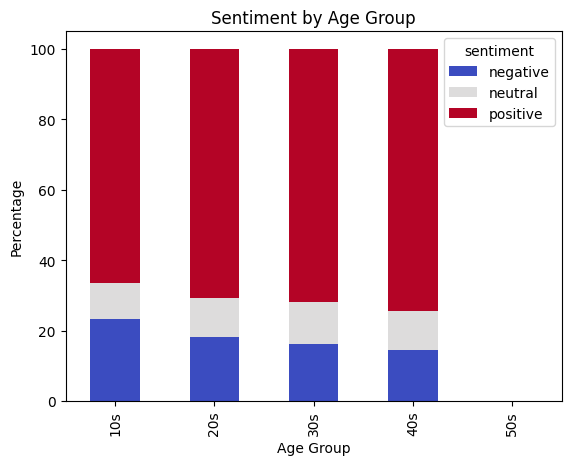

In [8]:
import pandas as pd

df['age_group'] = pd.cut(df['age'], bins=[10, 20, 30, 40, 50, 60], labels=['10s', '20s', '30s', '40s', '50s'])
age_sentiment = df.groupby(['age_group', 'sentiment']).size().unstack().fillna(0)
age_sentiment_percent = age_sentiment.div(age_sentiment.sum(axis=1), axis=0) * 100

age_sentiment_percent.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Sentiment by Age Group")
plt.ylabel("Percentage")
plt.xlabel("Age Group")
plt.show()

In [10]:
sign_sentiment = df.groupby(['sign', 'sentiment']).size().unstack().fillna(0)
sign_sentiment_percent = sign_sentiment.div(sign_sentiment.sum(axis=1), axis=0) * 100
    
print(sign_sentiment_percent)

sentiment     negative    neutral   positive
sign                                        
Aquarius     19.393403  10.473565  70.133033
Aries        19.340094  12.216254  68.443651
Cancer       20.032899  10.698254  69.268848
Capricorn    19.991464  10.650190  69.358346
Gemini       19.111282  11.207079  69.681639
Leo          18.659754  10.683689  70.656557
Libra        19.843497  11.152446  69.004057
Pisces       18.309807  10.504505  71.185688
Sagittarius  19.072268  11.056040  69.871692
Scorpio      19.613023  11.159707  69.227270
Taurus       19.820655  11.313758  68.865587
Virgo        19.444031  10.998526  69.557443


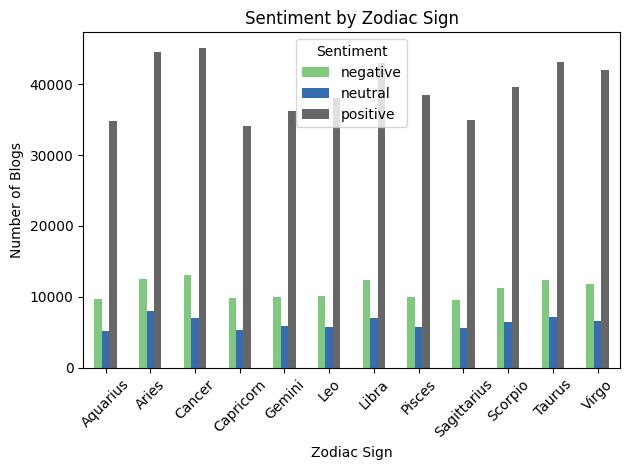

In [11]:
sign_sentiment = df.groupby(['sign', 'sentiment']).size().unstack().fillna(0)
sign_sentiment.plot(kind='bar', colormap='Accent')
plt.title("Sentiment by Zodiac Sign")
plt.xlabel("Zodiac Sign")
plt.ylabel("Number of Blogs")
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


C:\Users\RAMESH\AppData\Local\Temp\ipykernel_10956\413446080.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['gender', 'age_group', 'sentiment']).size().unstack().fillna(0)


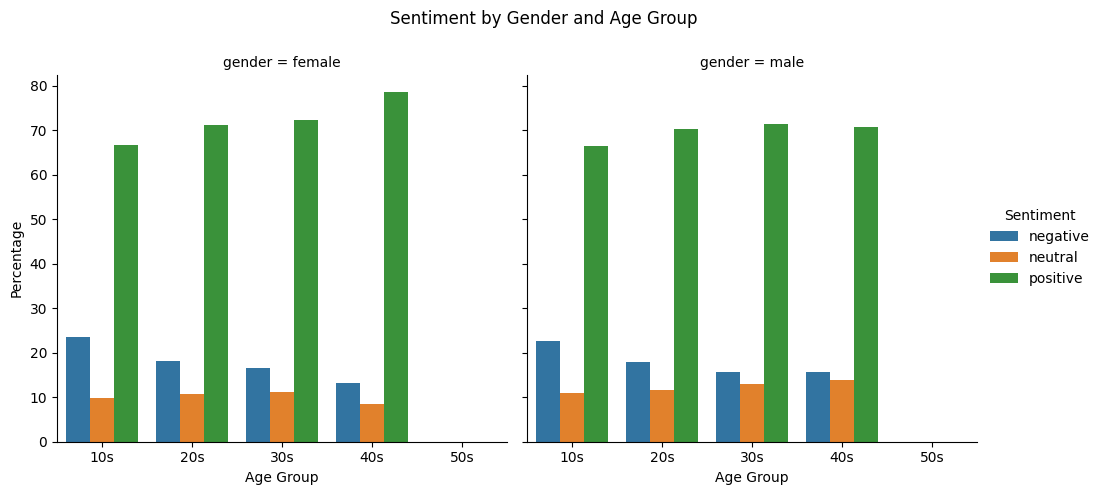

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by gender, age group, and sentiment
grouped = df.groupby(['gender', 'age_group', 'sentiment']).size().unstack().fillna(0)
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Reset index for plotting
grouped_percent = grouped_percent.reset_index().melt(id_vars=['gender', 'age_group'],
                                                     var_name='Sentiment',
                                                     value_name='Percentage')

# Create bar plot split by gender using catplot
g = sns.catplot(
    data=grouped_percent,
    x='age_group',
    y='Percentage',
    hue='Sentiment',
    col='gender',
    kind='bar',
    height=5,
    aspect=1
)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Sentiment by Gender and Age Group')
g.set_axis_labels("Age Group", "Percentage")
g._legend.set_title('Sentiment')
plt.show()


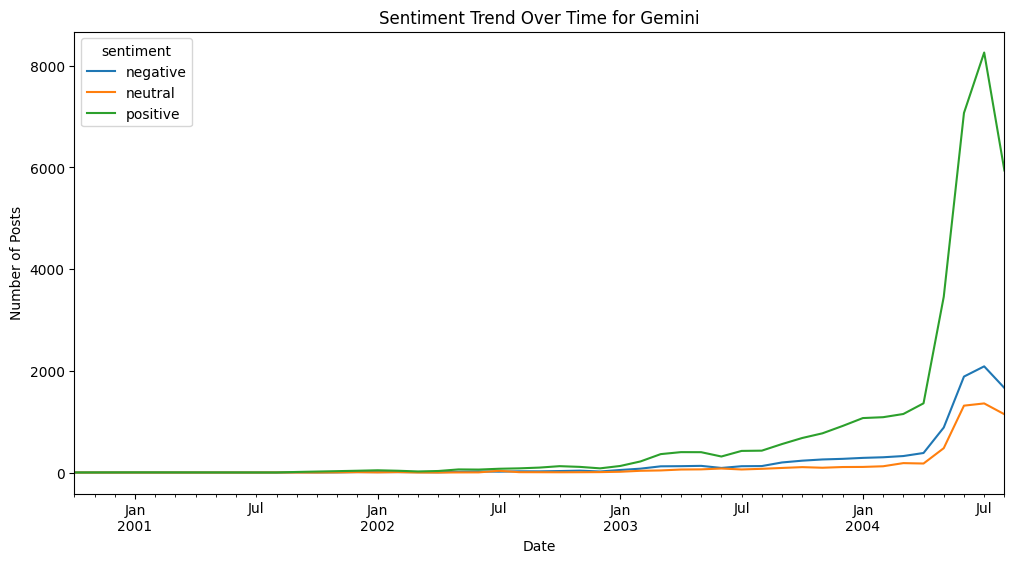

In [40]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
time_trend = df.groupby([df['date'].dt.to_period('M'), 'sign'])['sentiment'].value_counts().unstack().fillna(0)

# Example for one sign like 'Leo'
Gemini_sentiment = time_trend.xs('Gemini', level='sign')

Gemini_sentiment.plot(figsize=(12, 6), title='Sentiment Trend Over Time for Gemini')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.show()


PCA Component Loadings:
sentiment  negative   neutral  positive
PC1       -0.455557 -0.359035  0.814593
PC2       -0.677594  0.733321 -0.055727


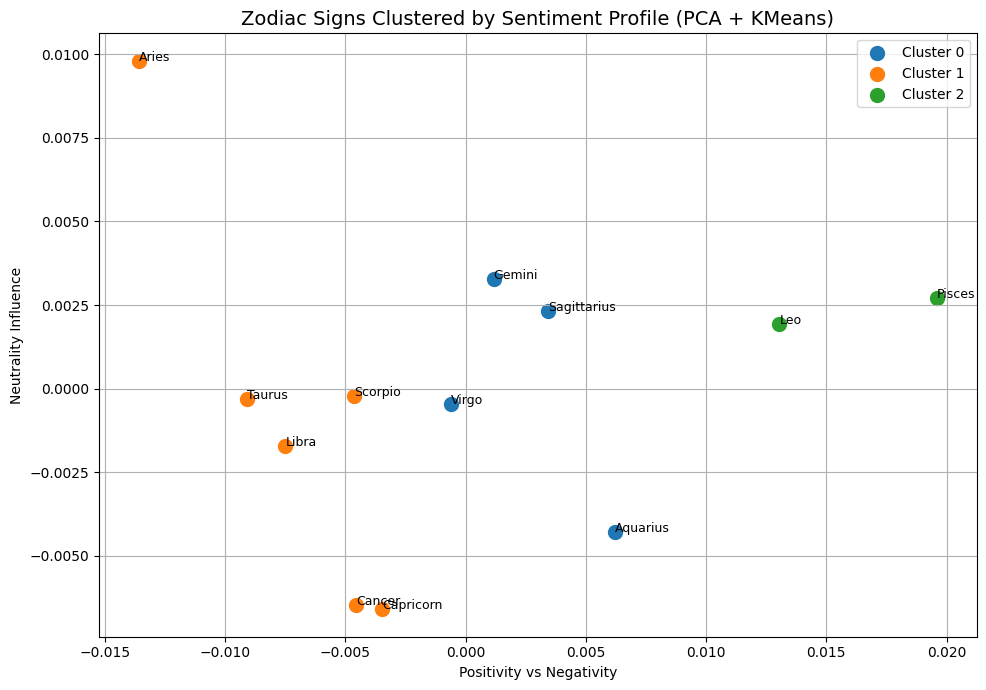

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Group by sign and sentiment, normalize
sentiment_counts = df.groupby('sign')['sentiment'].value_counts().unstack().fillna(0)
sentiment_norm = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(sentiment_norm)
sentiment_norm['cluster'] = clusters

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(sentiment_norm.drop('cluster', axis=1))

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=sentiment_norm.index)
pca_df['cluster'] = clusters

# Get PCA loadings to interpret axes
components = pd.DataFrame(
    pca.components_,
    columns=sentiment_norm.drop('cluster', axis=1).columns,
    index=['PC1', 'PC2']
)
print("PCA Component Loadings:")
print(components)

# Optional: Rename axes based on loading interpretation
# Example logic:
pc1_label = "Positivity vs Negativity"  # if PC1 loads heavily on positive and negatively on negative
pc2_label = "Neutrality Influence"      # if PC2 loads mostly on neutral

# Visualize clusters
plt.figure(figsize=(10, 7))
for cluster_id in sorted(pca_df['cluster'].unique()):
    subset = pca_df[pca_df['cluster'] == cluster_id]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster_id}', s=100)

# Annotate zodiac signs
for sign in pca_df.index:
    plt.annotate(sign, (pca_df.loc[sign, 'PC1'], pca_df.loc[sign, 'PC2']), fontsize=9)

plt.title('Zodiac Signs Clustered by Sentiment Profile (PCA + KMeans)', fontsize=14)
plt.xlabel(pc1_label)
plt.ylabel(pc2_label)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
